<a href="https://colab.research.google.com/github/kaioalexandre/COVID-19/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonte: **COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University**

https://github.com/CSSEGISandData/COVID-19

O objetivo é analisar o crescimento do número de casos, mortes e recuperados de covid-19 e compreender seu comportamento ao longo do tempo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
covid_data_casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [ ]:
covid_data_casos[covid_data_casos['Country/Region'] == 'Australia']

In [ ]:
covid_data_casos = covid_data_casos.drop(['Province/State', 'Lat', 'Long'], axis=1)

covid_data_casos

In [ ]:
covid_data_casos = covid_data_casos.groupby(['Country/Region']).sum()
covid_data_casos

In [ ]:
covid_data_casos.loc[['Australia', 'Brazil']]

# Casos por dia

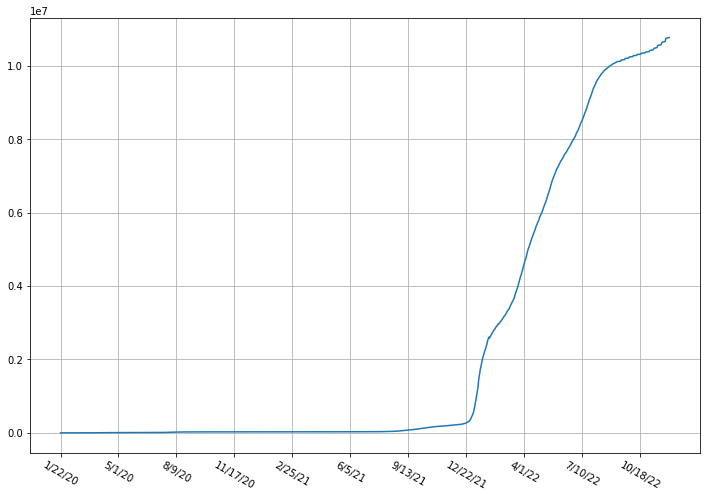

In [ ]:
# casos por dia

fig = plt.figure(figsize=(12,8))
ax = plt.axes()


ax.plot(covid_data_casos.loc['Australia']);

ax.set_xticks(ax.get_xticks()[::100]);
ax.tick_params(axis='x', labelrotation=-30);
ax.grid();

In [ ]:
# dataset de mortes
covid_data_mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
covid_data_mortes = covid_data_mortes.drop(['Province/State', 'Lat', 'Long'], axis=1)
covid_data_mortes = covid_data_mortes.groupby(['Country/Region']).sum()
covid_data_mortes

In [ ]:
# dataset de recuperados
covid_data_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
covid_data_recuperados = covid_data_recuperados.drop(['Province/State', 'Lat', 'Long'], axis=1)
covid_data_recuperados = covid_data_recuperados.groupby(['Country/Region']).sum()
covid_data_recuperados

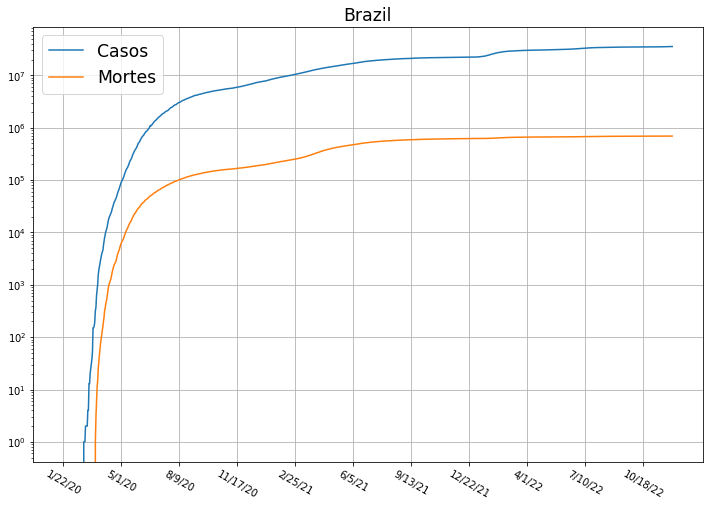

In [ ]:
pais = 'Brazil'

fig = plt.figure(figsize=(12,8))
ax = plt.axes()


ax.plot(covid_data_casos.loc[pais], label='Casos')
ax.plot(covid_data_mortes.loc[pais], label='Mortes')
#ax.plot(covid_data_recuperados.loc[pais], label='Recuperados')

ax.tick_params(axis='x', labelrotation=-30)
ax.grid()
ax.legend(fontsize='xx-large')
ax.set_title(pais, fontsize='xx-large')
plt.yscale('log')
ax.set_xticks(ax.get_xticks()[::100]);

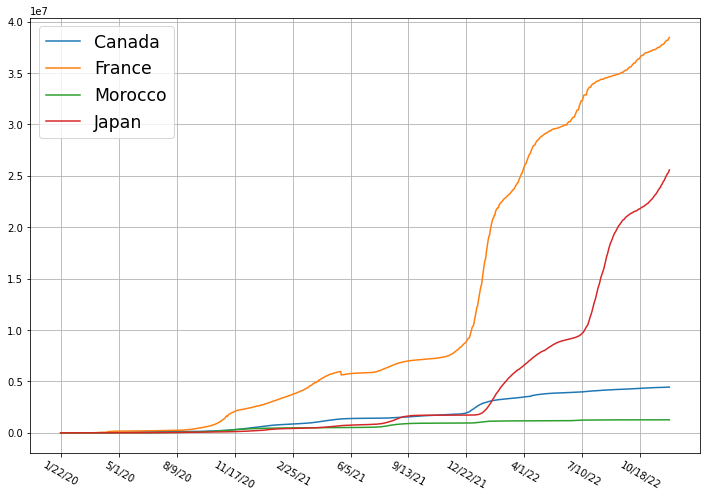

In [ ]:
#Comparando em relação a outros países
pais_america = 'Canada'
pais_europa = 'France'
pais_africa = 'Morocco'
pais_asia = 'Japan'

fig = plt.figure(figsize=(12,8))
ax = plt.axes()


ax.plot(covid_data_casos.loc[pais_america], label=pais_america)
ax.plot(covid_data_casos.loc[pais_europa], label=pais_europa)
ax.plot(covid_data_casos.loc[pais_africa], label=pais_africa)
ax.plot(covid_data_casos.loc[pais_asia], label=pais_asia)

ax.tick_params(axis='x', labelrotation=-30)
ax.grid()
ax.legend(fontsize='xx-large')
# plt.yscale('log')
ax.set_xticks(ax.get_xticks()[::100]);

In [ ]:
# novos casos por semana

pais = 'Australia'

covid_data_casos_no_index = covid_data_casos.loc[pais]


In [ ]:
covid_data_casos_no_index = covid_data_casos.loc[pais].reset_index(drop=True)

covid_data_casos_por_semana = covid_data_casos_no_index.groupby(covid_data_casos_no_index.index // 7).apply(lambda x : x.iloc[-1] - x.iloc[0])

covid_data_total_de_casos_por_semana = covid_data_casos_no_index.groupby(covid_data_casos_no_index.index // 7).last()

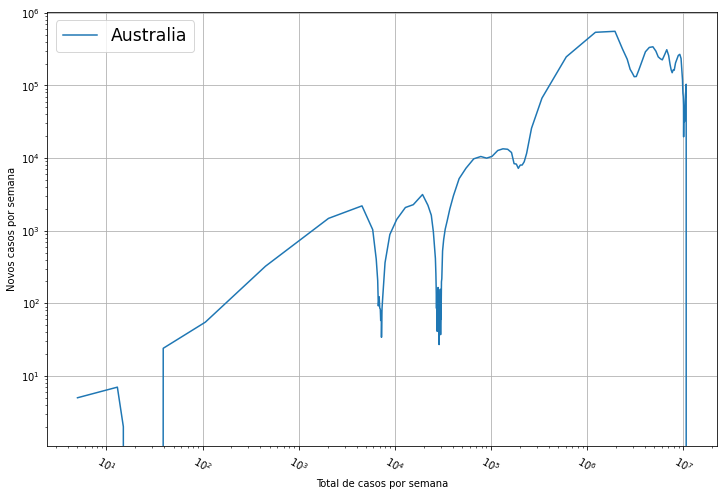

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()


plt.plot(covid_data_total_de_casos_por_semana, covid_data_casos_por_semana, label=pais)

ax.tick_params(axis='x', labelrotation=-30)
ax.grid()
ax.legend(fontsize='xx-large')

plt.xscale('log')
plt.yscale('log')

ax.set_xlabel('Total de casos por semana')
ax.set_ylabel('Novos casos por semana');